# Introduction
## Problem statement 
The problem statement involves BoomBikes, a US-based bike-sharing provider, facing revenue challenges due to the COVID-19 pandemic. To overcome this setback, the company aims to devise a strategic business plan to boost revenue once the lockdown restrictions ease and the economy recovers. Specifically, BoomBikes wants to comprehend the post-quarantine demand for shared bikes in the American market to position itself favorably amidst competitors and generate substantial profits.

To achieve this goal, BoomBikes has engaged a consulting firm to analyze the factors influencing the demand for shared bikes. The key objectives are:

1. Identifying significant variables that play a pivotal role in predicting the demand for shared bikes.
2. Evaluating the effectiveness of these variables in accurately describing the fluctuations in bike demands.

## Business goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Assignment
Please visit [my github](https://github.com/cuonghv0298/Bike-Sharing-Regression.git) for all information you need.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data Understanding
1. Data for Assignment
2. Dictionary Data

## Data for Assignment

In [4]:
df= pd.read_csv('data/day.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


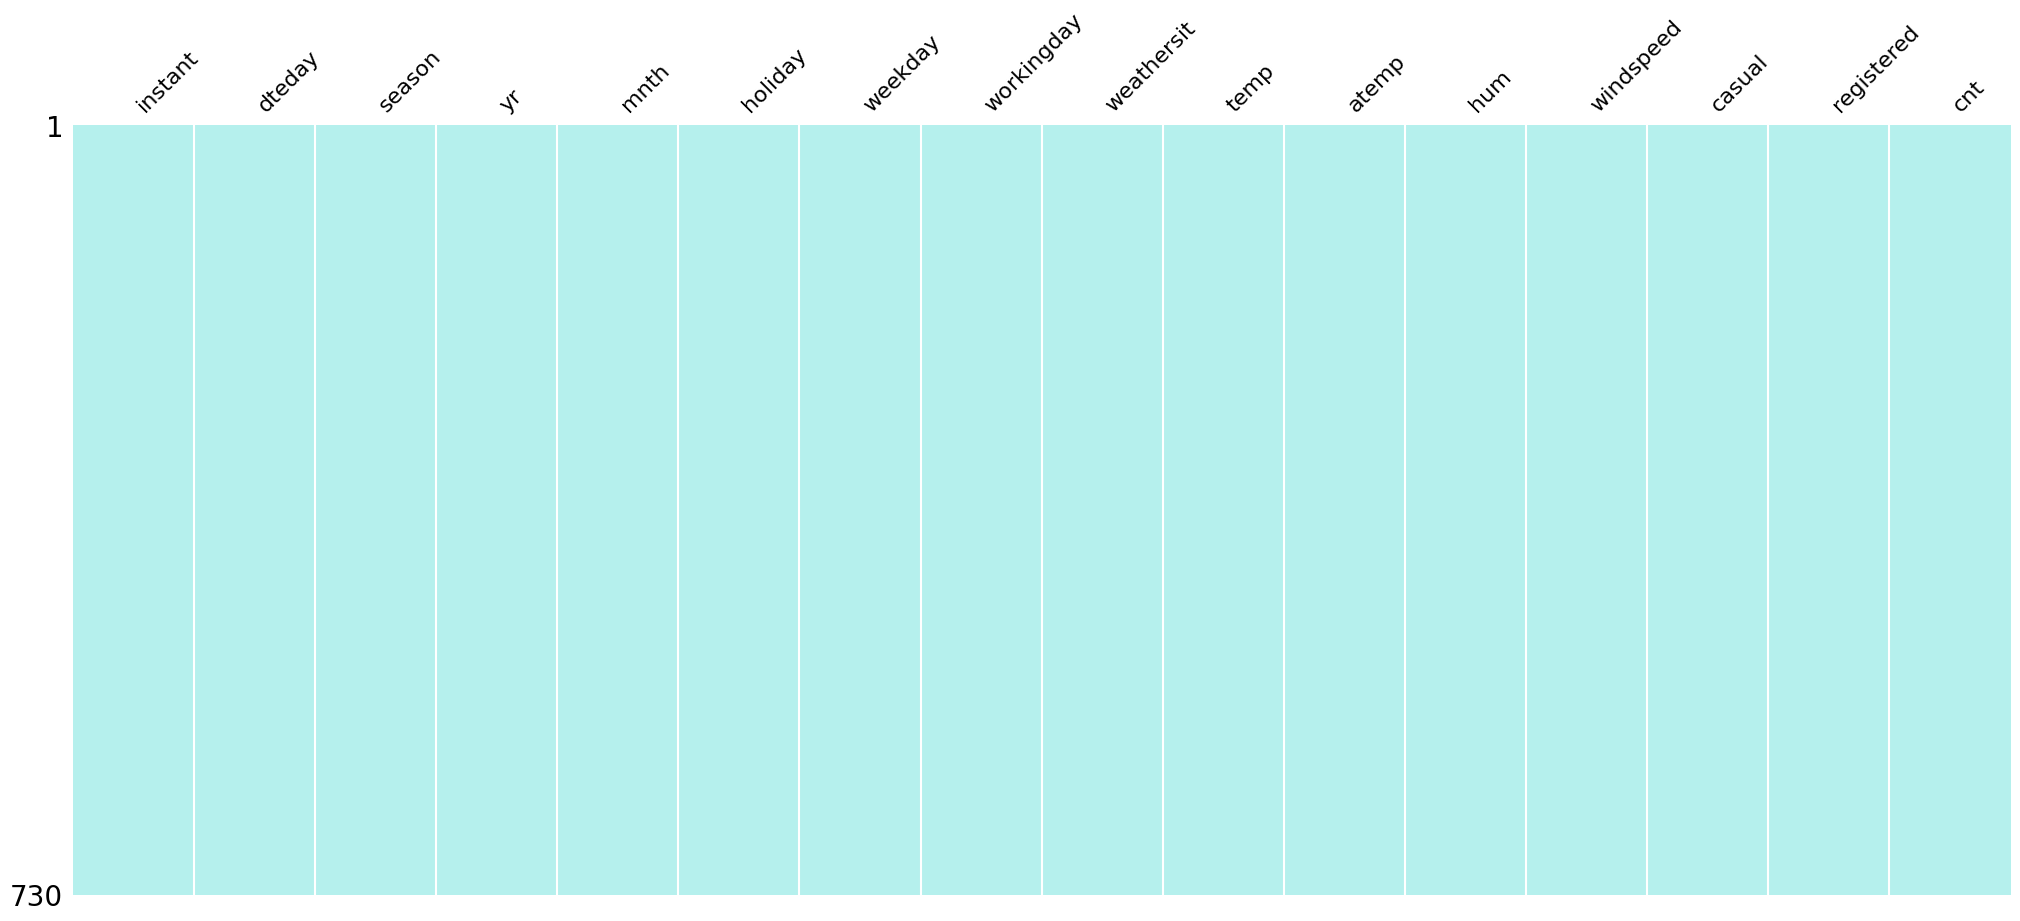

In [7]:
#overview missing data
fig = msno.matrix(df,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

> have no missing data

In [8]:
# Check duplicate
bike_dup=df
bike_dup.drop_duplicates(subset=None, inplace=True)
if bike_dup.shape == df.shape :
    print('There have no duplicate')
else:
    print('Some duplicates in dataset')

There have no duplicate


In [9]:
# check columns with only one values
columns  = list(df.columns)
columns_vales_count = {c : len(df[c].value_counts().index) for c in columns}
one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
if len(one_value_column) > 0:
    print(f'Columns have only one value: {one_value_column}')
else:
    print('There is no column with only one values')

There is no column with only one values


In [10]:
#rename the columns
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace =True)

In [12]:
# numerical columns and categorical columns
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
cat_col = ['year', 'holiday', 'workingday', 'month', 'weathersit', 'season', 'weekday']

## Dictionary Data

In [13]:
# Mapping the vars - season,month,weathersit,weekday
# The explaination based on data/Readme.txt
season_dict = {1: 'spring', 2: 'summer',3:'fall', 4:'winter'}
month_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
weathersit_dict = {1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'}
weekday_dict = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
year_dict = {0:'2018', 1:'2019'}
holiday_dict = {0:'non_holiday', 1:'holiday'}
workingday_dict  = {0:'non_workingday', 1:'workingday'}

# Preprocess data
1. I drop useless columns:
    * instant jusst represent the index
    * dteday is described by year, month, weekday
    *  casual and registered are not features
2. Map categorical values 
3. Create the dummy variables for all categorical varibles where number of categories > 2 

In [14]:
# drop useless columns
df = df.drop(columns=['instant','dteday', 'casual', 'registered'])

In [16]:
# Map categorical values
df_map = df.copy()
df_map['season']=df_map.season.map(season_dict)
df_map['month']=df_map.month.map(month_dict)
df_map['weathersit']=df_map.weathersit.map(weathersit_dict)
df_map['weekday']=df_map.weekday.map(weekday_dict)
df_map['year'] = df_map.year.map(year_dict)
df_map['holiday'] = df_map.holiday.map(holiday_dict)
df_map['workingday'] = df_map.workingday.map(workingday_dict)
df_map.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,non_holiday,Sat,non_workingday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,non_holiday,Sun,non_workingday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,non_holiday,Mon,workingday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,non_holiday,Tue,workingday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,non_holiday,Wed,workingday,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Create the dummy variables for all categorical varibles where number of categories > 2
df_dummy = df.copy()
dummmy_col = [col for col in cat_col if df_map[col].nunique() > 2]
df_dummy = pd.get_dummies(df_map[dummmy_col], drop_first=True)
df_dummy =  pd.concat([df, df_dummy], axis=1)
df_dummy = df_dummy.drop(columns=dummmy_col)
df_dummy.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_July', 'month_June', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy', 'season_spring', 'season_summer',
       'season_winter', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

# EDA
1. Univariate Analyst
2. Bivariate Analyst

## Univariate Analyst

In [18]:
def univariate_analysis1(df, column):
    _, p = plt.subplots(2,1, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(f'{column}')
    p[1].set_xlabel(f'{column}')
    plt.tight_layout()
    plt.show()
def drop_outliner(df, col):
    old_rows = len(df)
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    upper = q75 + 1.5 * iqr
    new_df = df[df[col] < upper]
    new_rows = len(new_df)
    print('Percentage of dropped row: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df

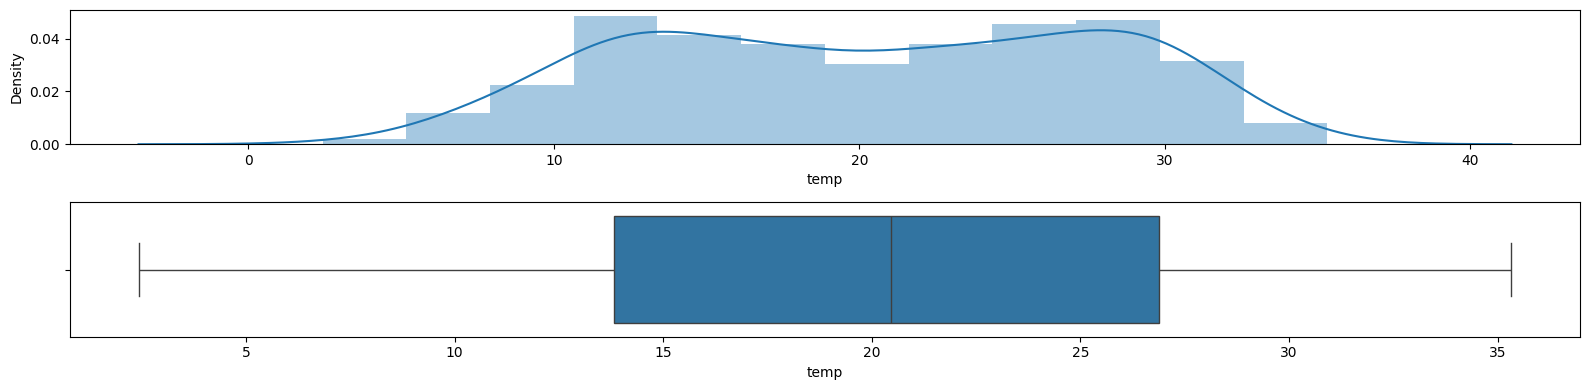

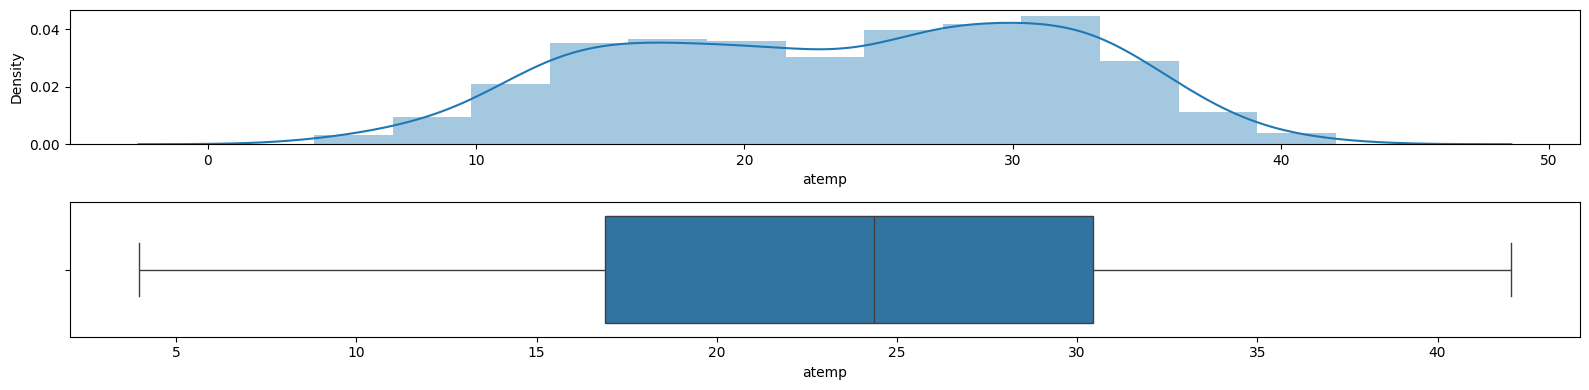

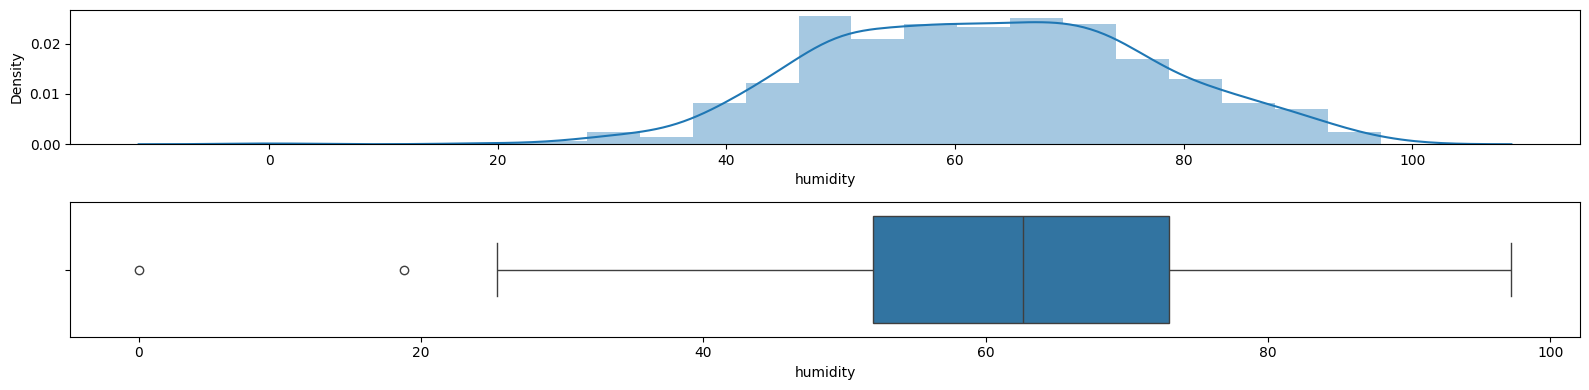

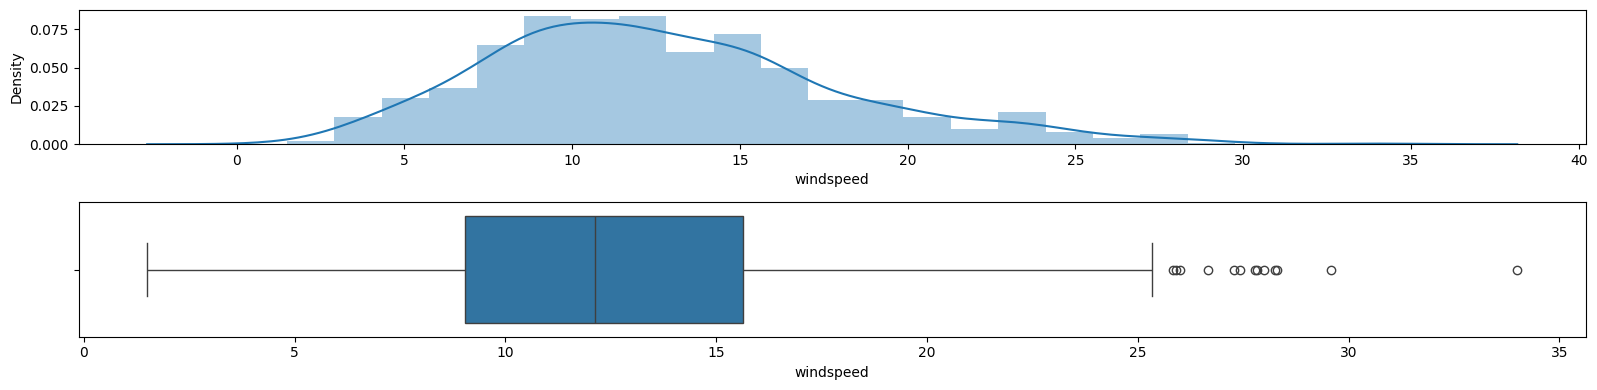

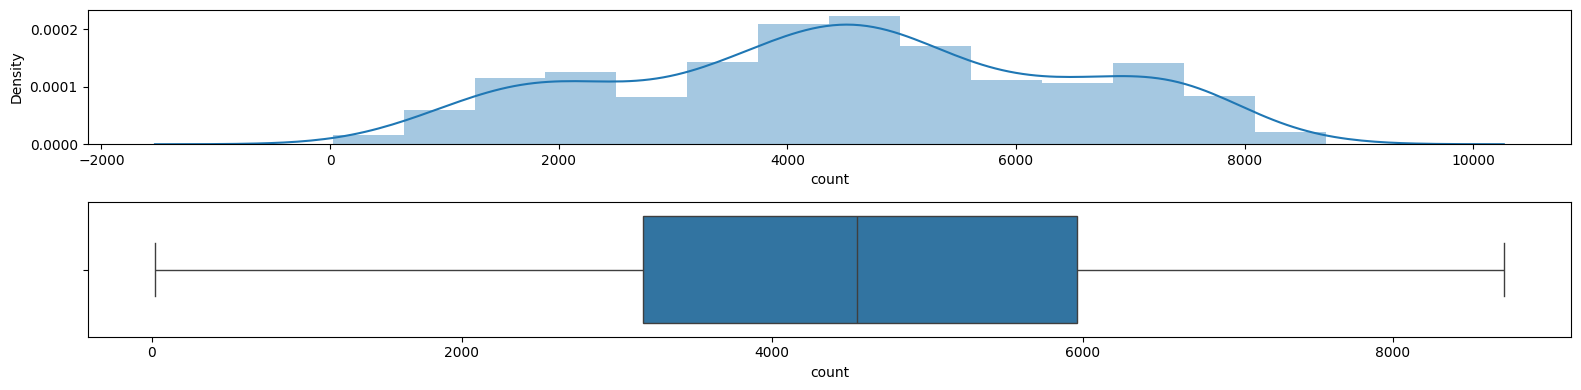

In [19]:
# plot dist and box
for c in num_cols:
    univariate_analysis1(df_map, c)

> Some outlier from windspeed

In [20]:
# Double check and drop outlier for windspeed
for c in num_cols:
    print(f'drop outlier for: {c}')
    df= drop_outliner(df,c)

drop outlier for: temp
Percentage of dropped row:  0.0 %
drop outlier for: atemp
Percentage of dropped row:  0.0 %
drop outlier for: humidity
Percentage of dropped row:  0.0 %
drop outlier for: windspeed
Percentage of dropped row:  1.78 %
drop outlier for: count
Percentage of dropped row:  0.0 %


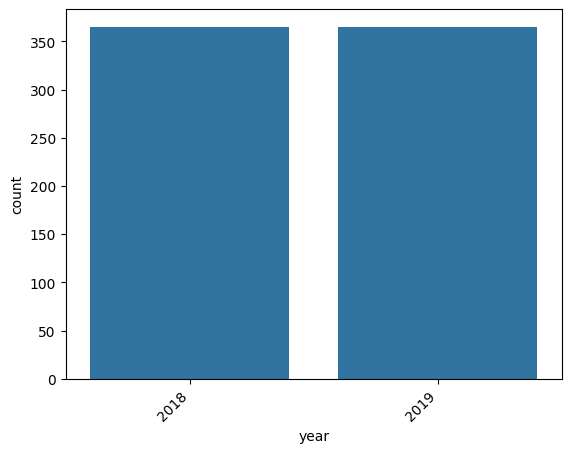

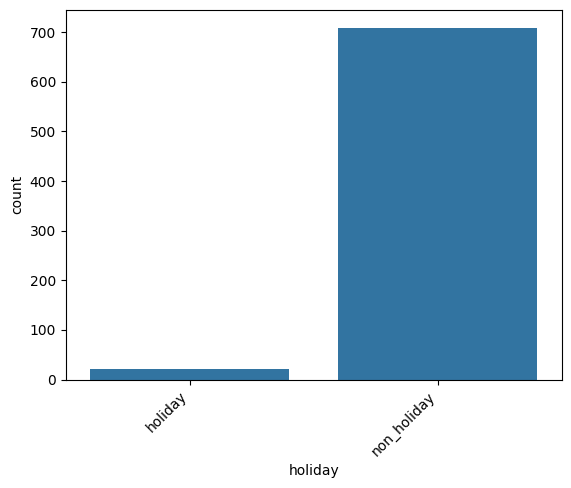

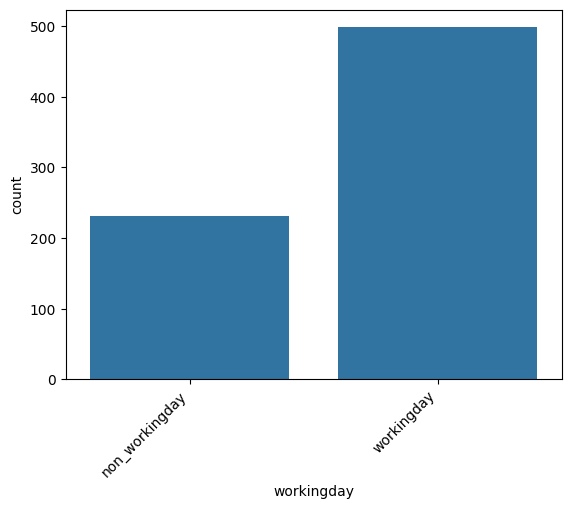

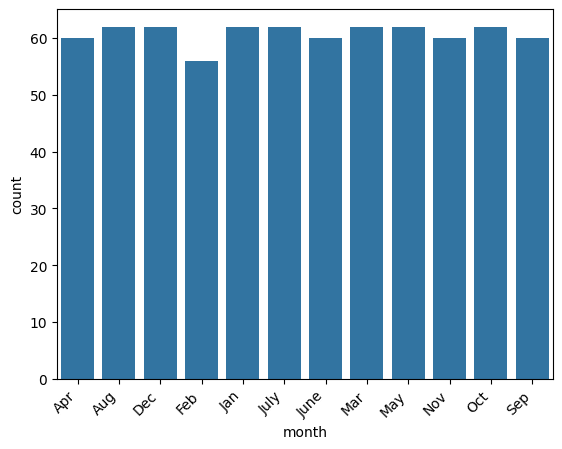

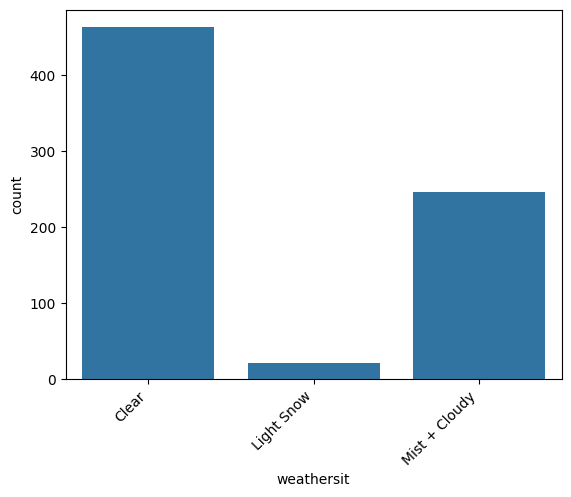

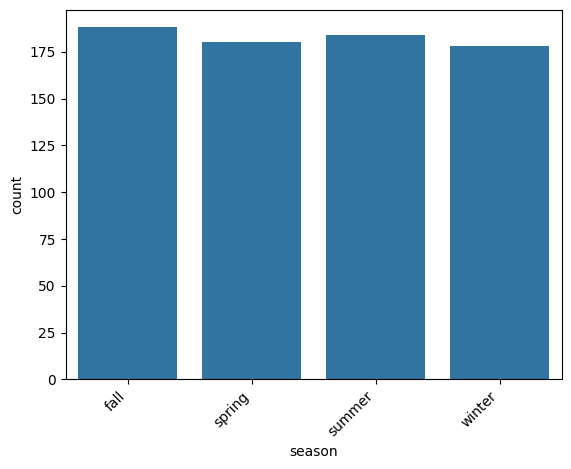

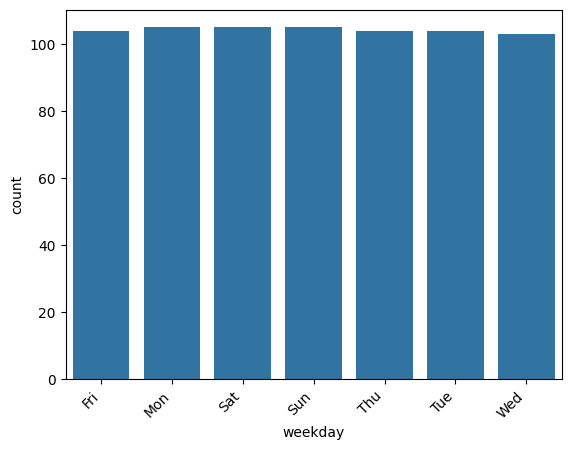

In [21]:
# Check imbalance data
for c in cat_col:
    sorted_order =df_map[c].value_counts().index.sort_values()
    ax = sns.countplot(data=df_map, x=c,  order=sorted_order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    plt.show()

> Imbalanced data has been identified in the holiday and weathersit columns. This may be impacting the model we are attempting to manage

## Bivariate Analyst

<Figure size 1500x3000 with 0 Axes>

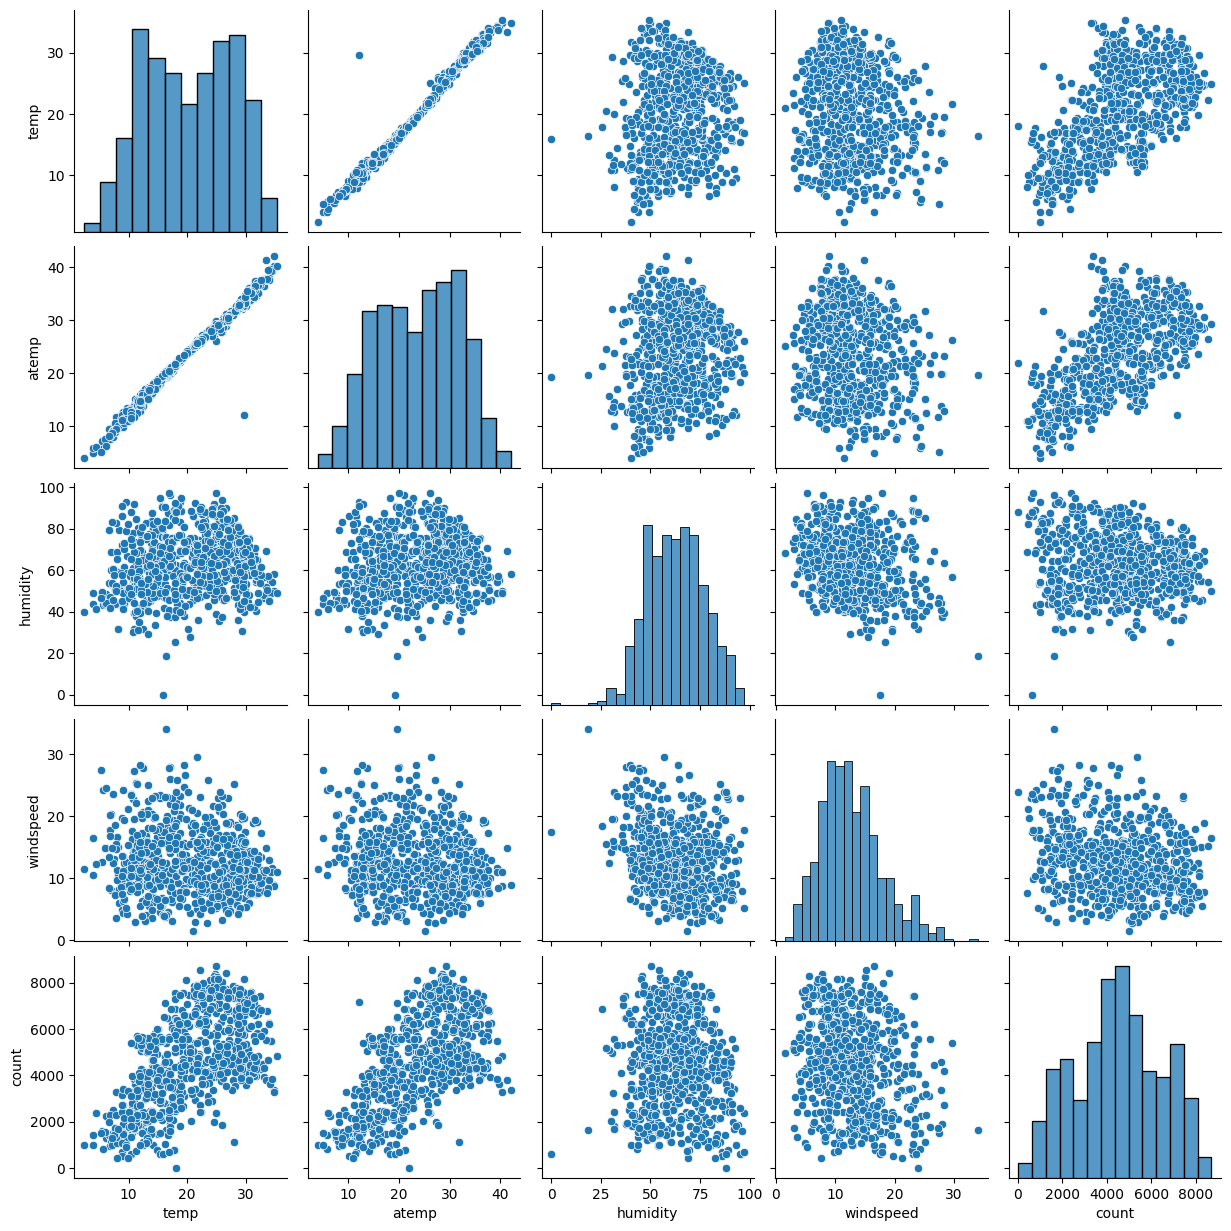

In [22]:
# Use pairplot
plt.figure(figsize = (15,30))
sns.pairplot(data=df_map,vars=num_cols)
plt.show()

> 1. Total count of the bikes are corelated to Temperature
> 2. Total count is not influenced with Windspeed,humidity

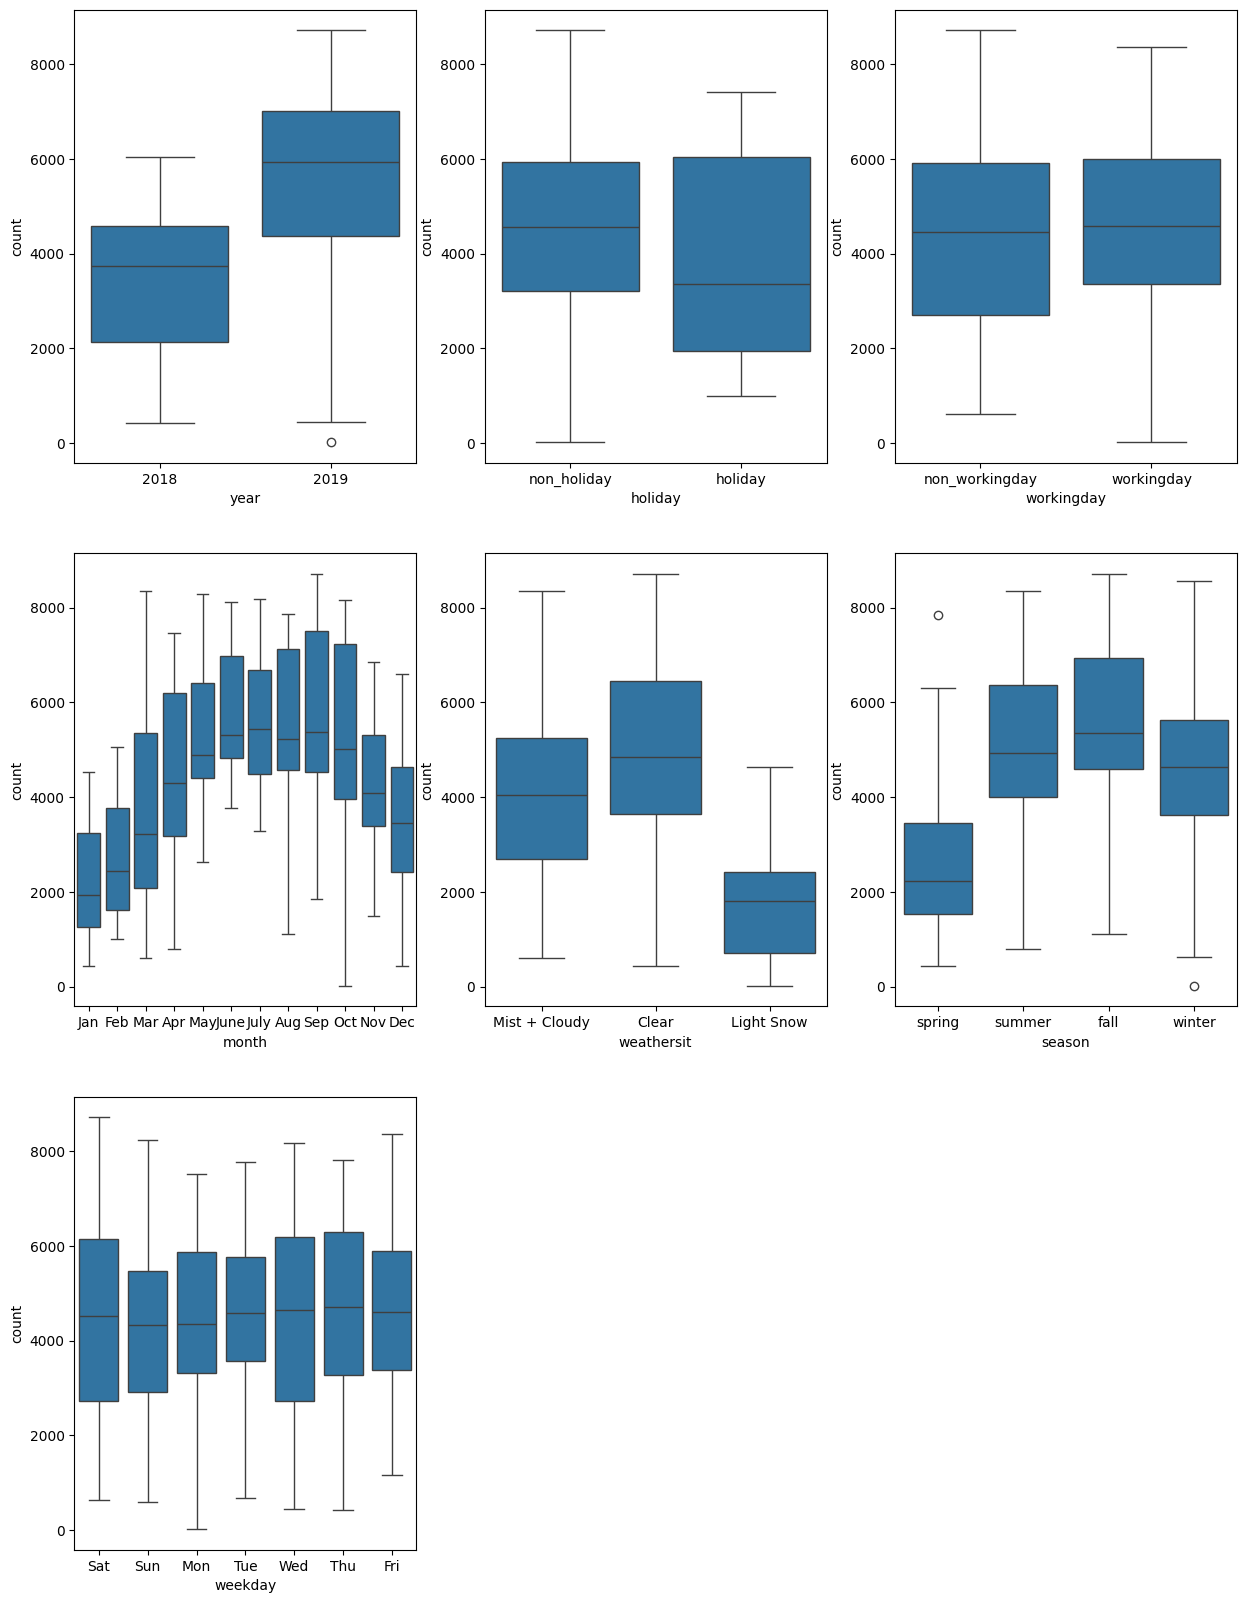

In [23]:
# scatter plot for categorical vars
plt.figure(figsize=(15, 20))
for i,col_name in enumerate(cat_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col_name, y = 'count', data = df_map)
plt.show()

1. More bike rentals in 2019
2. Equal bike rentals in hoidays / non-holidays
3. Equal bike rentals in woking day / non working day
4. The peak period for bike rentals occurred between August and October.
5. More rentals on Clear weather
6. More rentals on fall
7. Less rentals on Sunday

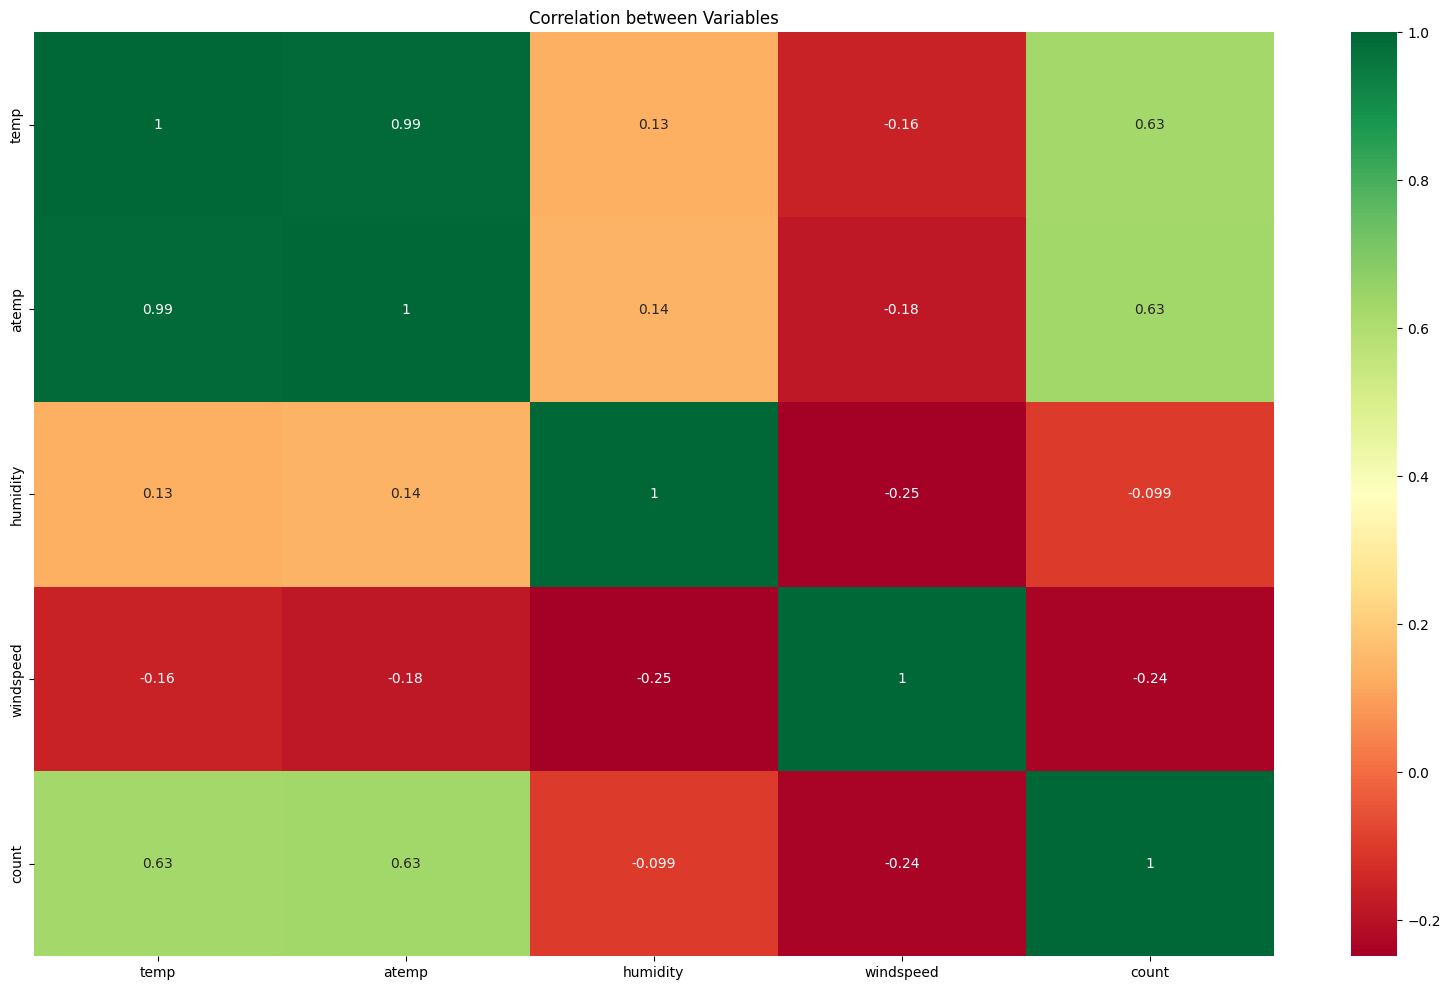

In [24]:
#Heatmap to see correlation between numerical variables
plt.figure(figsize=(20, 12))
sns.heatmap(df_map.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

> Temperature shows the strongest correlation with "feels like" temperature (atemp). Since they convey the same meaning, I have decided to drop one variable, atemp.

> 

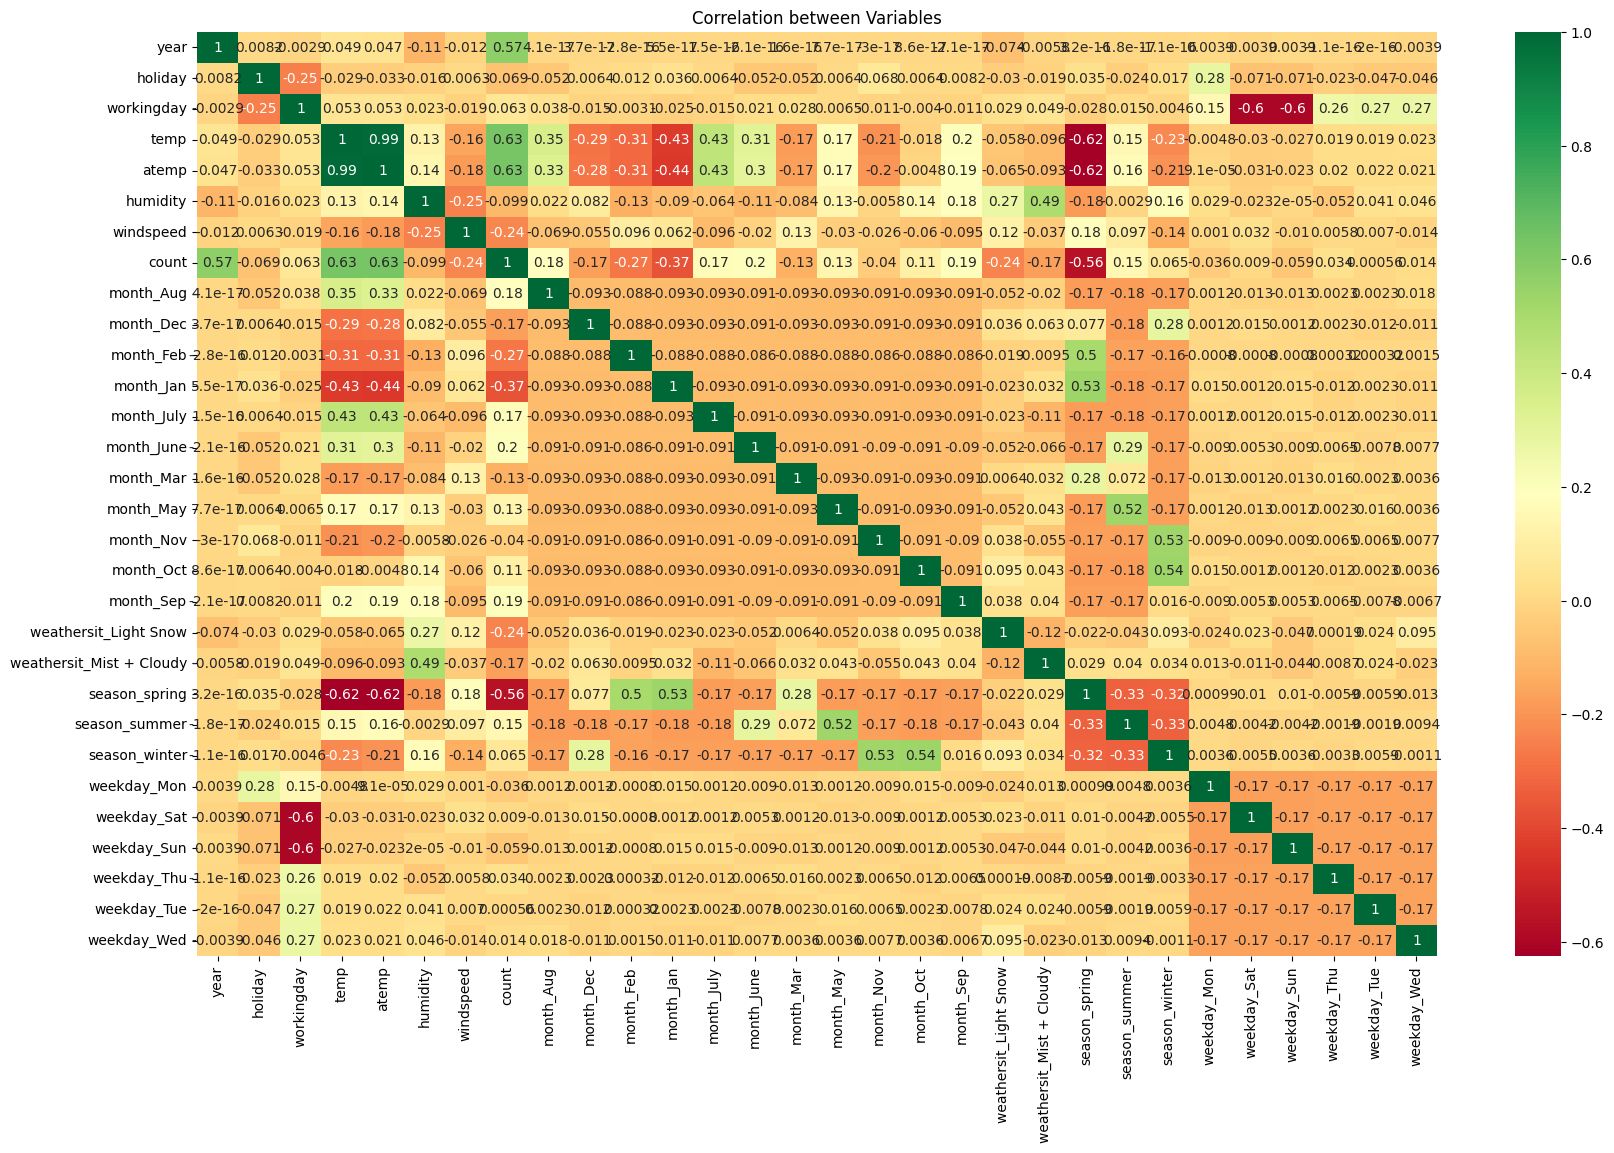

In [25]:
#Heatmap to see correlation between train variables
plt.figure(figsize=(20, 12))
sns.heatmap(df_dummy.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

> weekday_Sat and weekday_Sun is a non Working day so they have a correlation

In [26]:
df_dummy = df_dummy.drop(columns='atemp')

# Data preparing
1. Train test split  
2. Scaling
3. Automation feature selection

## Train test split 

In [27]:
#splitting the data set for train & test
train, test = train_test_split(df_dummy,train_size=0.8,random_state= 42)
#check the ratio
print(train.shape)
print(test.shape)


(584, 29)
(146, 29)


## Scaling
I use MinMax method

In [28]:
#minMax the scale 
scaler=MinMaxScaler()
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']
#fit on data
train[num_vars]=scaler.fit_transform(train[num_vars])
train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,month_Aug,month_Dec,month_Feb,...,weathersit_Mist + Cloudy,season_spring,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
247,0,1,0,0.765327,0.814513,0.475900,0.382996,0,0,0,...,1,0,0,0,1,0,0,0,0,0
335,0,0,1,0.317788,0.644911,0.195963,0.450759,0,1,0,...,0,0,0,1,0,0,0,0,0,0
702,1,0,1,0.519232,0.756118,0.379454,0.757478,0,1,0,...,0,0,0,1,0,0,0,0,1,0
440,1,0,0,0.566998,0.778874,0.220845,0.898988,0,0,0,...,1,1,0,0,0,1,0,0,0,0
136,0,0,1,0.626185,0.863461,0.637592,0.471813,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [29]:
# Transform the test data using the previously fitted scaler
test[num_vars] = scaler.transform(test[num_vars])
test.head()

,year,holiday,workingday,temp,humidity,windspeed,count,month_Aug,month_Dec,month_Feb,...,weathersit_Mist + Cloudy,season_spring,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
468,1,0,0,0.543115,0.518248,0.421436,0.855729,0,0,0,...,0,0,1,0,0,1,0,0,0,0
148,0,0,0,0.758058,0.843709,0.479005,0.548320,0,0,0,...,0,0,1,0,0,0,1,0,0,0
302,0,0,0,0.324018,0.642765,0.385676,0.380695,0,0,0,...,0,0,0,1,0,0,1,0,0,0
355,0,0,1,0.453814,0.780592,0.062226,0.350437,0,1,0,...,1,1,0,0,0,0,0,1,0,0
515,1,0,1,0.773634,0.507943,0.432344,0.841694,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## Feature selection

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
# X_train & y_train
y_train= train.pop('count')
X_train=train

In [32]:
# number of features
len(X_train.columns)

28

### Automation feature selection (RFE features)


In [33]:
# Use RFE chose 15 features
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,n_features_to_select=15) # running RFE
rfe=rfe.fit(X_train,y_train)

In [34]:
# see the list of variables 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_Aug', False, 10),
 ('month_Dec', True, 1),
 ('month_Feb', False, 12),
 ('month_Jan', False, 8),
 ('month_July', True, 1),
 ('month_June', False, 13),
 ('month_Mar', False, 3),
 ('month_May', False, 4),
 ('month_Nov', True, 1),
 ('month_Oct', False, 5),
 ('month_Sep', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', False, 2),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 14)]

In [35]:
# RFE selected variabbles
col_rfe=X_train.columns[rfe.support_]
col_rfe

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'month_Dec', 'month_July', 'month_Nov', 'month_Sep',
       'weathersit_Light Snow', 'season_spring', 'season_winter',
       'weekday_Sat', 'weekday_Sun'],
      dtype='object')

# Model building
* Model 1: Build by all features
* Model 2: Build with RFE features
* From Model 3 to model 5: Manual feature selection
    * Manual feature selection step by step based on p_values and VIF:

In [36]:
# Function for VIF Calculation
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

## Model 1 (Train with all features)

In [37]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     110.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          4.62e-204
Time:                        17:45:07   Log-Likelihood:                 584.58
No. Observations:                 584   AIC:                            -1113.
Df Residuals:                     556   BIC:                            -990.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Model 2 (Train with RFE features)

In [38]:
# Add a constant
X_train_rfe=X_train[col_rfe]
X_train_lm2 = sm.add_constant(X_train_rfe)
# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          3.21e-208
Time:                        17:45:07   Log-Likelihood:                 560.50
No. Observations:                 584   AIC:                            -1091.
Df Residuals:                     569   BIC:                            -1025.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

> Holiday have high P value, so it is removed.

## Model 3 (drop holiday feature)

In [39]:
X_train_model3 = X_train_rfe.drop(columns= 'holiday')
X_train_lm3 = sm.add_constant(X_train_model3)
# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          3.21e-208
Time:                        17:45:07   Log-Likelihood:                 560.50
No. Observations:                 584   AIC:                            -1091.
Df Residuals:                     569   BIC:                            -1025.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.35

>weekday_Sun have high P value, so it is removed.

## model 4 (drop weekday_Sun)

In [40]:
X_train_model4 = X_train_model3.drop(columns= 'weekday_Sun')
X_train_lm4 = sm.add_constant(X_train_model4)
# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     212.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.04e-209
Time:                        17:45:07   Log-Likelihood:                 559.28
No. Observations:                 584   AIC:                            -1091.
Df Residuals:                     570   BIC:                            -1029.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.38

> The P values are optimised now so I continue eliminating by VIF

In [41]:
calculateVIF(X_train_model4)

,Features,VIF
3,humidity,17.38
2,temp,15.31
4,windspeed,4.99
1,workingday,4.47
11,season_winter,2.74
10,season_spring,2.45
0,year,2.06
7,month_Nov,1.75
12,weekday_Sat,1.72
6,month_July,1.51


> humidity has the highest VIF value, so I eliminate it

## Model 5 (drop humidity)

In [42]:
X_train_model5 = X_train_model4.drop(columns= 'humidity')
X_train_lm5 = sm.add_constant(X_train_model5)
# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.09e-194
Time:                        17:45:07   Log-Likelihood:                 522.92
No. Observations:                 584   AIC:                            -1020.
Df Residuals:                     571   BIC:                            -963.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [43]:
calculateVIF(X_train_model5)

,Features,VIF
2,temp,7.44
3,windspeed,4.92
1,workingday,4.31
10,season_winter,2.40
0,year,2.06
9,season_spring,1.79
6,month_Nov,1.74
11,weekday_Sat,1.68
5,month_July,1.44
4,month_Dec,1.33


> The VIF values are optimised so I check for correlation again

# Evaluation
1. With each model:
    * I have a plot for residual analysis
    * Make prediction and plot them with label
    * Report R_square and adjusted R_square
2. Finnaly, I compare all models

## evaluation each model

In [44]:
# create test set
y_test=test.pop("count")
X_test=test

In [45]:
model_dict = {}
class Evaluation():
    def __init__(self, y_train,X_train,y_test, X_test, model):
        # model = lr4
        # X_train = X_train_lm4
        self.y_train = y_train
        self.y_test= y_test
        self.X_test = X_test
        self.X_train = X_train
        self.model = model
        self.y_train_pred = model.predict(X_train)
        self.res= y_train - self.y_train_pred
        self.y_test_pred = self.cal_y_test_pred()
        
    def cal_y_test_pred(self):
        X_test_model = self.X_test[self.X_train.columns[1:]] # [1:] because when it has const column by sm.add_constant
        # Adding constant variable to test dataframe        
        X_test_lm = sm.add_constant(X_test_model)
        # Predict values
        y_pred = self.model.predict(X_test_lm)
        return y_pred
    
    def plot_residual_dist(self,):
        # The error terms histogram
        fig = plt.figure()
        sns.distplot((self.res), bins = 20)
        fig.suptitle('Error Terms')                  
        plt.xlabel('Errors')                         
        plt.show()
          
    def cal_r2(self, ):    
        return round(r2_score(self.y_test, self.y_test_pred),4)
    
    def cal_adjusted_r2(self,):
        r2 = self.cal_r2()
        # n is number of rows in test dataset
        n = self.X_test.shape[0]
        # Number of features (predictors, p) is the shape along axis 1
        p = self.X_test.shape[1]
        # We find the Adjusted R-squared using the formula
        return round(1-(1-r2)*(n-1)/(n-p-1),4)
    
    def plot_prediction(self,):
        # plot prediction with label
        fig = plt.figure()
        plt.scatter(self.y_test, self.y_test_pred,alpha = 0.7, c='blue')
        fig.suptitle('y_test vs y_pred')             
        plt.xlabel('y_test')                          
        plt.ylabel('y_pred') 
        plt.show()
        
    def report(self,):
        print(f'R2 train: {self.model.rsquared}')
        print(f'R2 test: {self.cal_r2()}')
        print(f'R2_adj train: {self.model.rsquared_adj}')
        print(f'R2_adj test: {self.cal_adjusted_r2()}')

### model 1

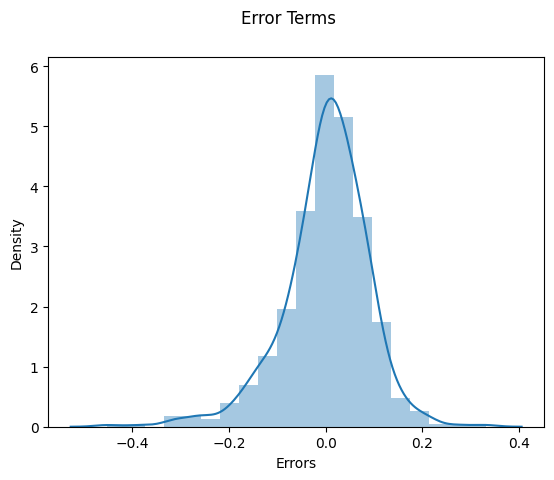

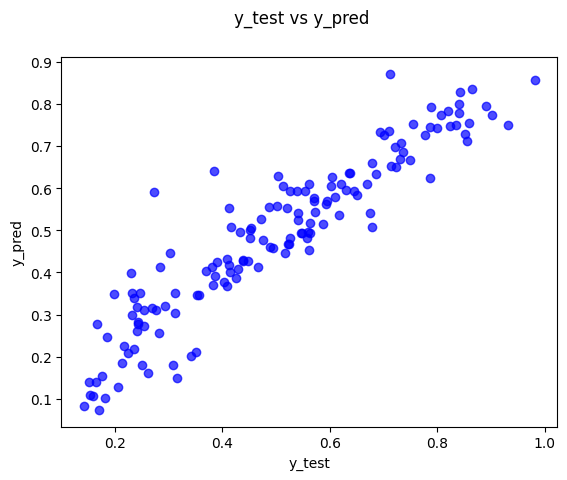

R2 train: 0.8434180810085992
R2 test: 0.862
R2_adj train: 0.8358142827841966
R2_adj test: 0.829


In [46]:
evaluation_model1 = Evaluation(y_train,X_train_lm1,y_test, X_test, lr1)
model_dict['model1'] = evaluation_model1
evaluation_model1.plot_residual_dist()
evaluation_model1.plot_prediction()
evaluation_model1.report()

### model 2

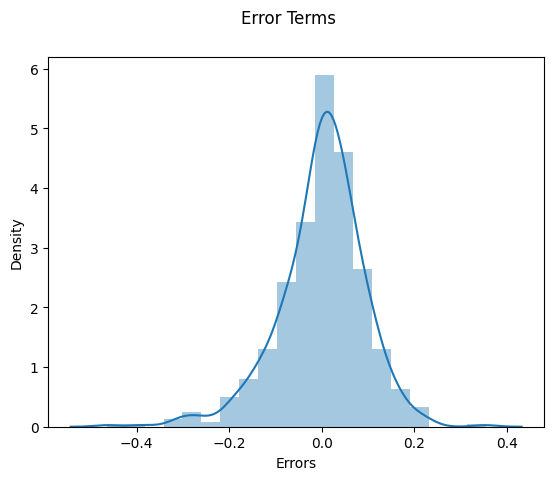

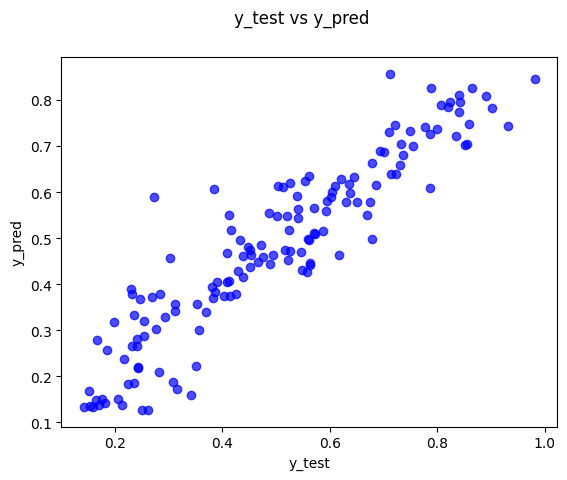

R2 train: 0.8299601635934857
R2 test: 0.8501
R2_adj train: 0.8257764066344502
R2_adj test: 0.8142


In [47]:
evaluation_model2 = Evaluation(y_train,X_train_lm2,y_test, X_test, lr2)
model_dict['model2'] = evaluation_model2
evaluation_model2.plot_residual_dist()
evaluation_model2.plot_prediction()
evaluation_model2.report()

### model 3

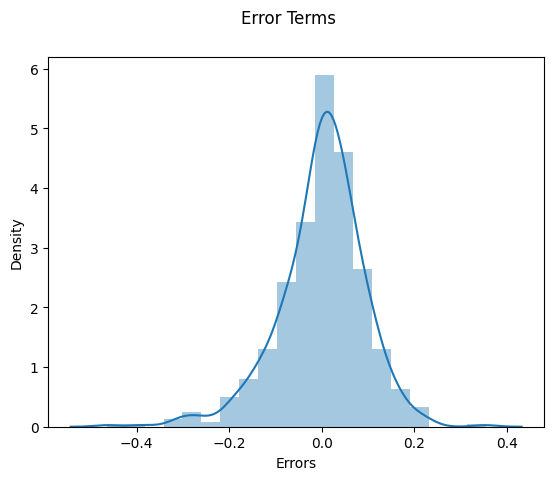

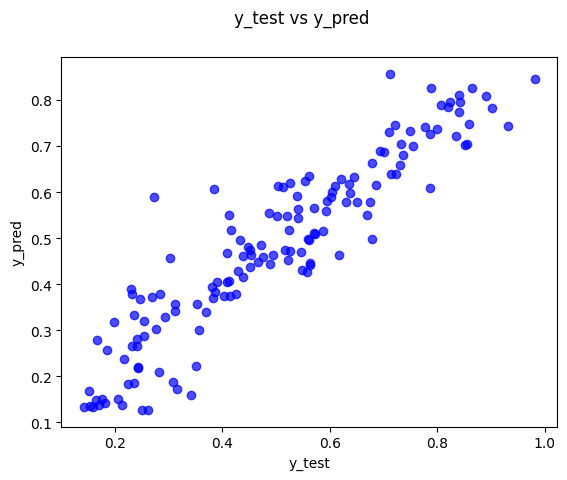

R2 train: 0.8299601635934857
R2 test: 0.8501
R2_adj train: 0.8257764066344502
R2_adj test: 0.8142


In [48]:
evaluation_model3 = Evaluation(y_train,X_train_lm3,y_test, X_test, lr3)
model_dict['model3'] = evaluation_model3
evaluation_model3.plot_residual_dist()
evaluation_model3.plot_prediction()
evaluation_model3.report()

### model4

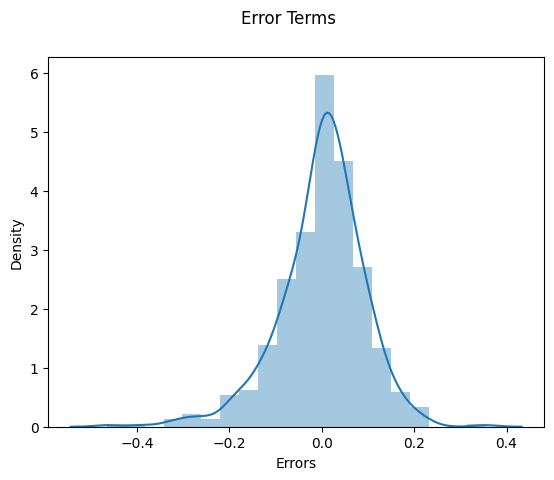

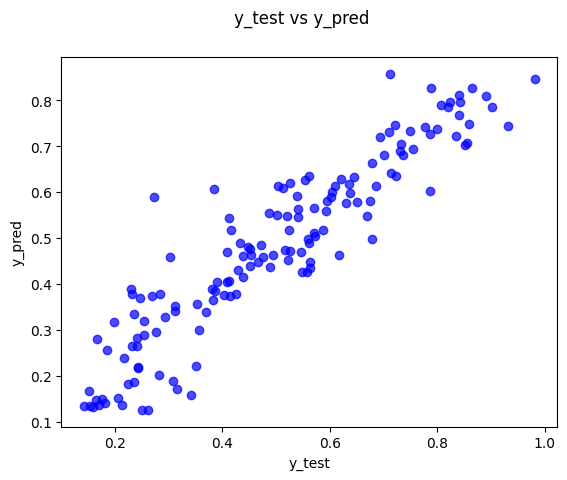

R2 train: 0.8292491898483143
R2 test: 0.8488
R2_adj train: 0.8253548731255566
R2_adj test: 0.8126


In [49]:
evaluation_model4 = Evaluation(y_train,X_train_lm4,y_test, X_test, lr4)
model_dict['model4'] = evaluation_model4
evaluation_model4.plot_residual_dist()
evaluation_model4.plot_prediction()
evaluation_model4.report()

### model 5

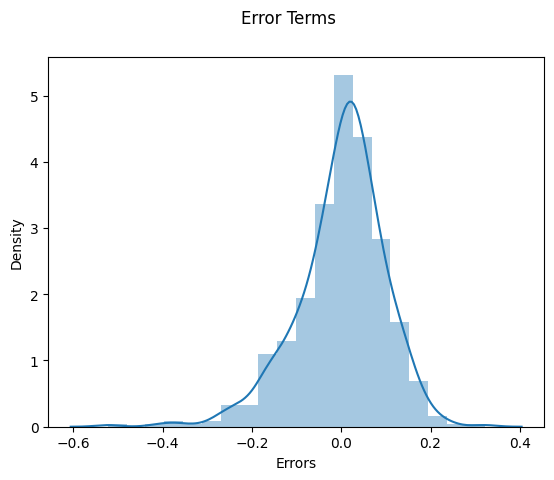

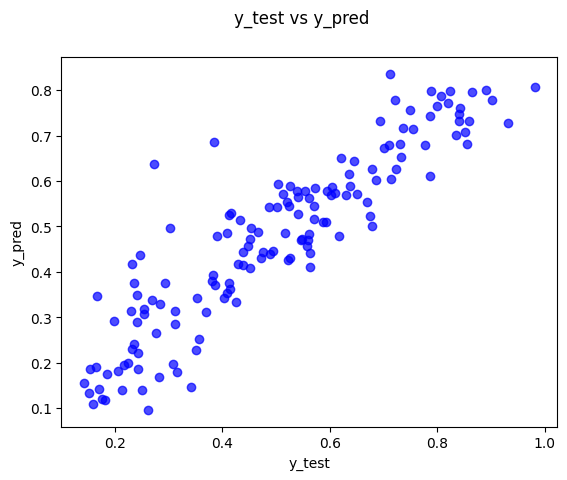

R2 train: 0.8066019338200154
R2 test: 0.811
R2_adj train: 0.802537526124464
R2_adj test: 0.7658


In [50]:
evaluation_model5 = Evaluation(y_train,X_train_lm5,y_test, X_test, lr5)
model_dict['model5'] = evaluation_model5
evaluation_model5.plot_residual_dist()
evaluation_model5.plot_prediction()
evaluation_model5.report()

## Comparasion

In [51]:
r2_dict = {k:v.cal_r2() for k,v in model_dict.items()}
r2_adj_dict = {k:v.cal_adjusted_r2() for k,v in model_dict.items()}

In [52]:
r2_dict.values()

dict_values([0.862, 0.8501, 0.8501, 0.8488, 0.811])

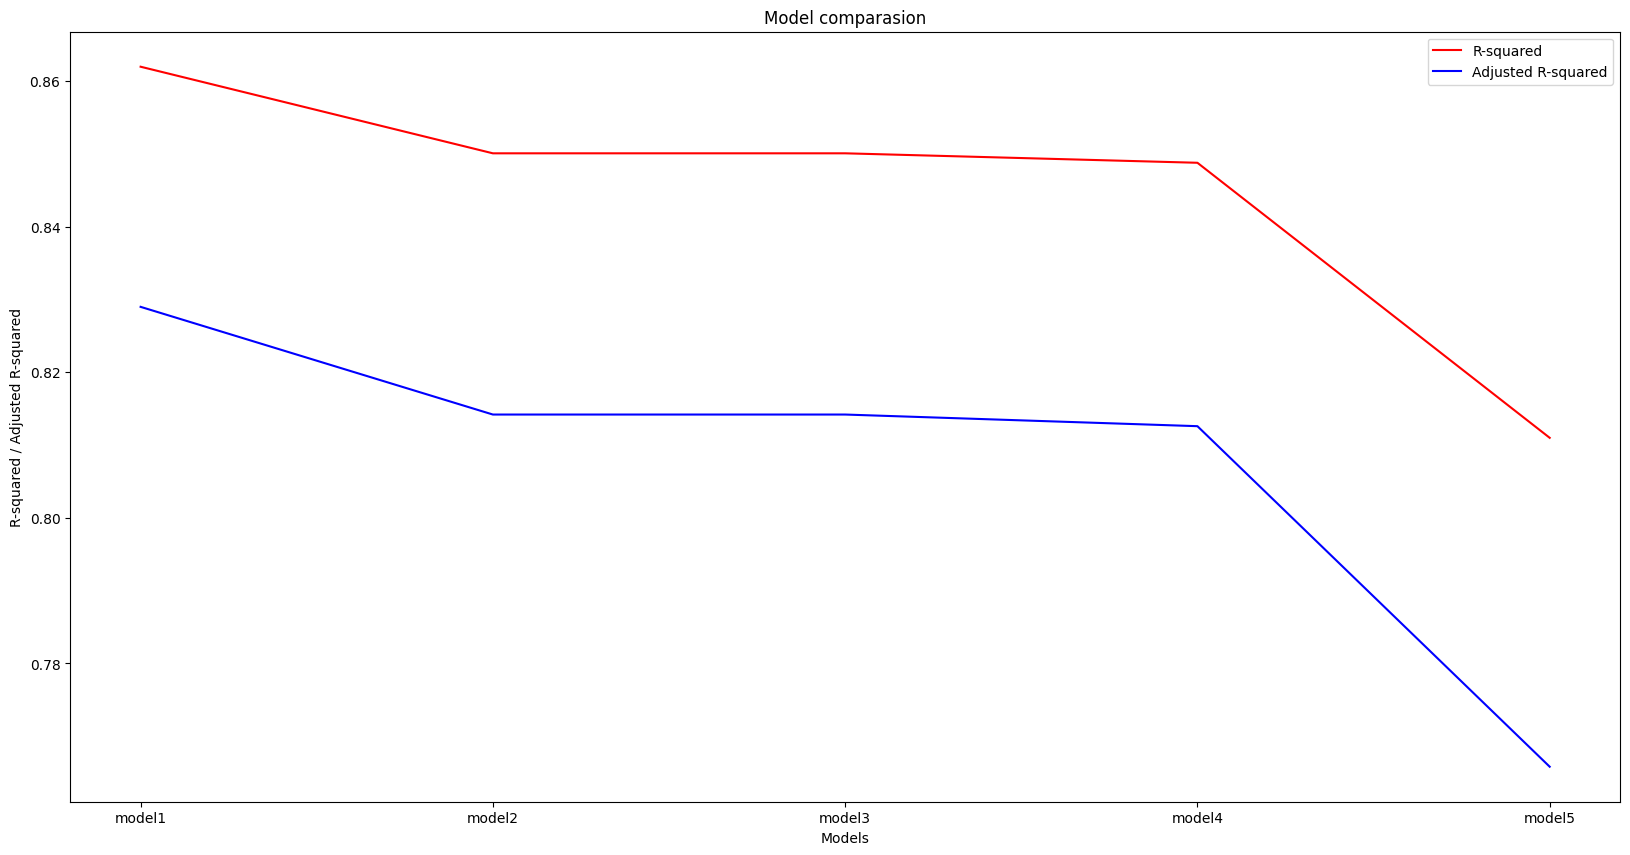

In [53]:
# comparation by r2 and r2_adj
plt.figure(figsize= (20,10))
plt.plot(r2_dict.keys(),r2_dict.values(), color= 'r', label='R-squared')
plt.plot(r2_adj_dict.keys(),r2_adj_dict.values(), color= 'b', label='Adjusted R-squared')
plt.title('Model comparasion')
plt.xlabel('Models')
plt.ylabel('R-squared / Adjusted R-squared')
plt.legend()
plt.show()